In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Casals Llado, Nuria (1513656)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

with the number of hidden layers, neurons on each layer, optimizer and batch size. Adagrad was the best performing optimizer among different architectures I tried. The model was not slow, so I played with 'small' batch sizes, and 32 was a reasonable choice. The performance is not bad given architecture restrictions.  Loss and accuracy curves are pretty smooth and the accuracy is 83.8%. The model is slightly overfitting. (length: 424)



Max val score: 83.78%


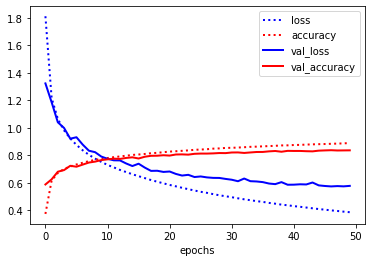

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 2000)              6146000   
_________________________________________________________________
dense_1 (Dense)              (None, 1400)              2801400   
_________________________________________________________________
dense_2 (Dense)              (None, 700)               980700    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               280400    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4010      
Total params: 10,212,510
Trainable params: 10,212,510
Non-trainable params: 0
____________________________________________

def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(2000, activation='relu'))
  model.add(layers.Dense(1400, activation='relu'))
  model.add(layers.Dense(700, activation='relu'))
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adagrad',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model



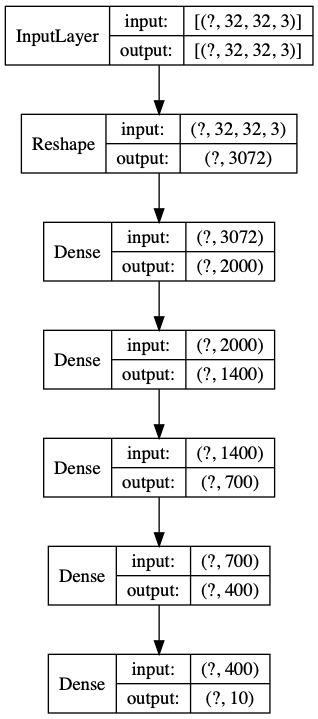

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

data (while classifying digits, the color is not meaningful) and the dimension of the data is divided by 3. We can see these changes reflected in the model accuracy, which improved by 1% (both in train and validation data). I tried to normalize the data but the performance did not change. This makes sense because the data is already sort of 'normalized' between 0 and 255. (length: 375)



Max val score: 84.85%


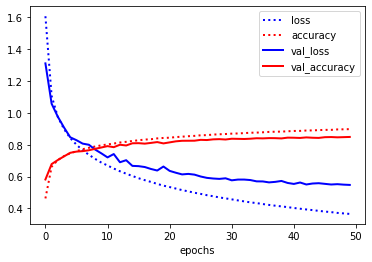

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              2050000   
_________________________________________________________________
dense_6 (Dense)              (None, 1400)              2801400   
_________________________________________________________________
dense_7 (Dense)              (None, 700)               980700    
_________________________________________________________________
dense_8 (Dense)              (None, 400)               280400    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                4010      
Total params: 6,116,510
Trainable params: 6,116,510
Non-trainable params: 0
____________________________________________

def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(2000, activation='relu'))
  model.add(layers.Dense(1400, activation='relu'))
  model.add(layers.Dense(700, activation='relu'))
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer='adagrad',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

value for the learning rate was 0.005, smaller values led to worse results (the learning was too slow for 50 epochs). I decreased the batch size to 16 (small batches can oﬀer a regularizing eﬀect because they add noise to the learning process). Whit these changes, the distance between train and validation accuracy decreased significantly, and the last increased to 86.7%. My experiments with dropout led to underfitting. (length: 423)



Max val score: 86.71%


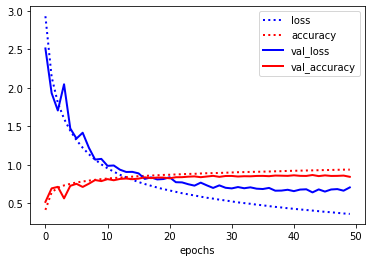

def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(2000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.Dense(1400, activation='relu'))
  model.add(layers.Dense(700, activation='relu'))
  model.add(layers.Dense(400, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  opt=optimizers.Adagrad(learning_rate=0.005)
  model.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

2 convolutional layers each. Then, I added 1 convolutional layer to each block and the performance increased. I tried adding a 4th block, and the performance was the same. I used zero-padding to be able to build a deeper model. I did max-pooling after every convolutional layer, reducing the image size by two every time, intuitively it makes the network robust and invariant to small changes. Adding batch normalization also helped reducing overfitting. I added a dropout after every block, gradually increasing the percentage. This forced layers deep in the model to regularize more than layers closer to the input, which is what we aim for. The final model(3x3xConv2D) performs well with validation accuracy of 95.3%, although the learning curve could be smoother. (length: 768)



Max val score: 95.34%


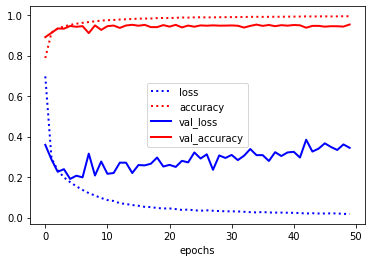

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.1))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model

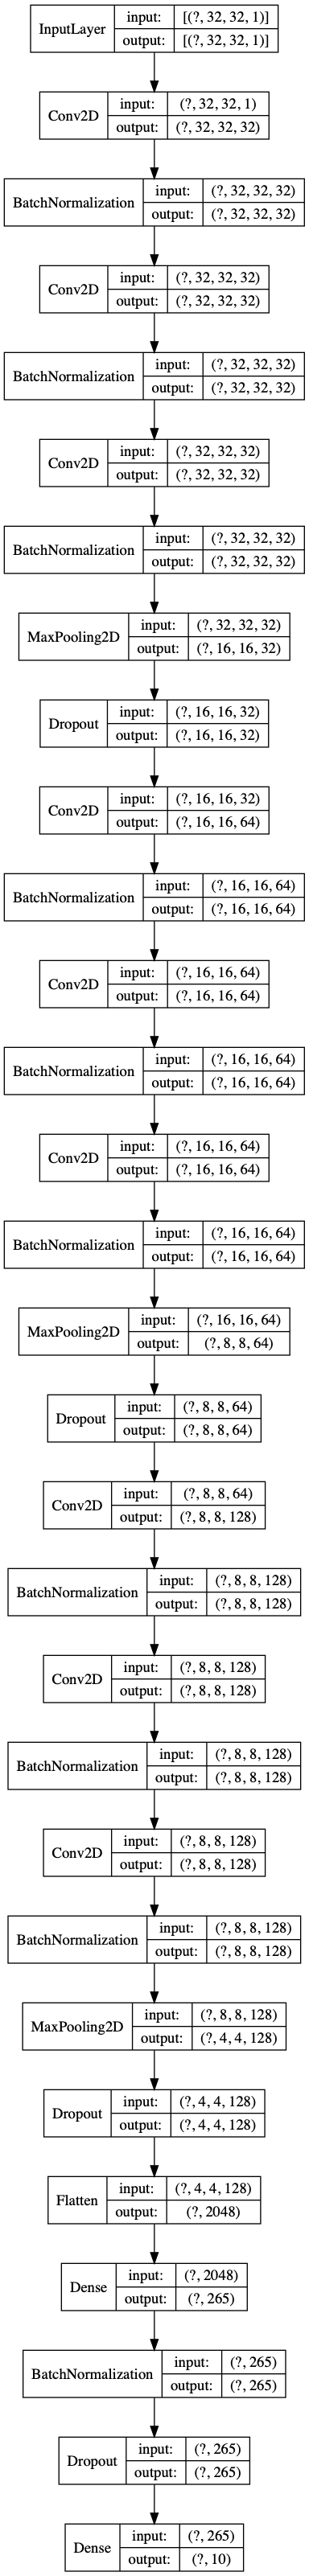

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

vertical flip can change the labeling of the digits (e.g. 6 and 9) or made them no longer digits. The same happens for rotation. After trying different techniques, a zoom of 0.2 (too much zoom would make the digits unreadable) reduced training accuracy and increased validation accuracy and smooth the curve. Since we expanded the size of the training set by creating modified versions of images, overfitting reduction is coherent. (length: 432)



Max val score: 95.98%


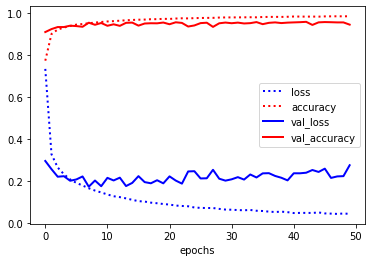


train_datagen = ImageDataGenerator(
    #width_shift_range=0.2,  
    #height_shift_range=0.2, 
    #horizontal_flip=True, # does not make sense
    zoom_range=0.2
    #rotation_range=90,
    #shear_range=0.2,
    # brightness_range=[0.2,1.0]
    #fill_mode='nearest'
    )


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

are most often confused are 1 with 7, 1 with 4, 6 with 8, 3 with 5 and vice-versa. Given that their shape is very similar, these errors make sense also at a human level. The best-classified classes are 2 and 1. The worse ones are 6 (which is often confused by 8) and 9 (which is confused by 2). So, my model could be improved in round shapes recognition, maybe trying to add another convolutional layer. If we plot the misclassified images with true label 6, we can see that some errors are due to rotations and blurry images, which could be hard to classify for a human eye too. Also, the classes are not perfectly balanced, which leads to a slightly biased model where the most represented classes have the lowest error. (length: 723)

Test score: 0.95%


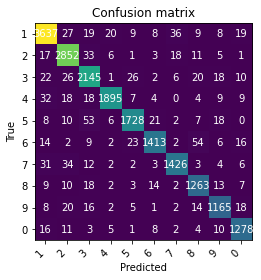

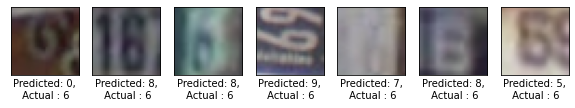

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

It is barely transforming the image, which is good to keep the info in deeper layers. In the second image (still first block), we do not have empty activations anymore, and the filter is detecting the edges. The third filter (second conv block) is increasingly abstract, it seems like it is recognizing the two 'holes' in the 8 shape. The last conv layer learns abstract patterns and we do not recognize the digit anymore. (length: 423)



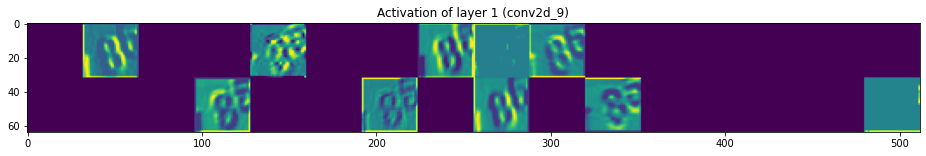

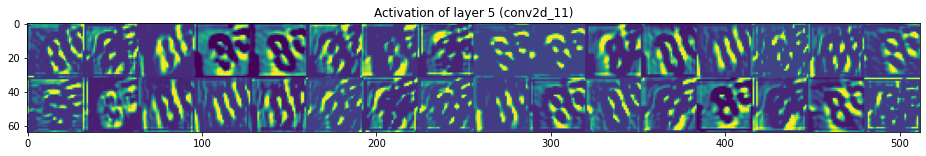

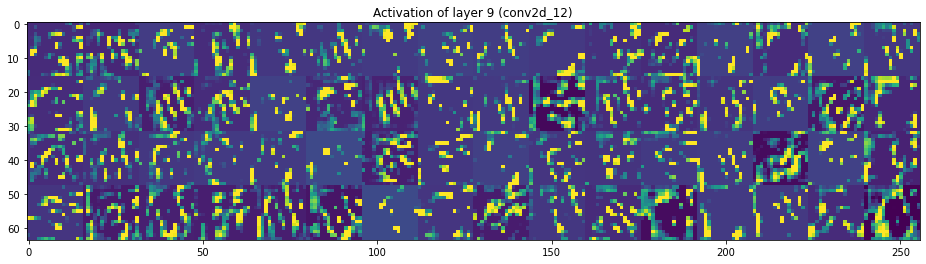

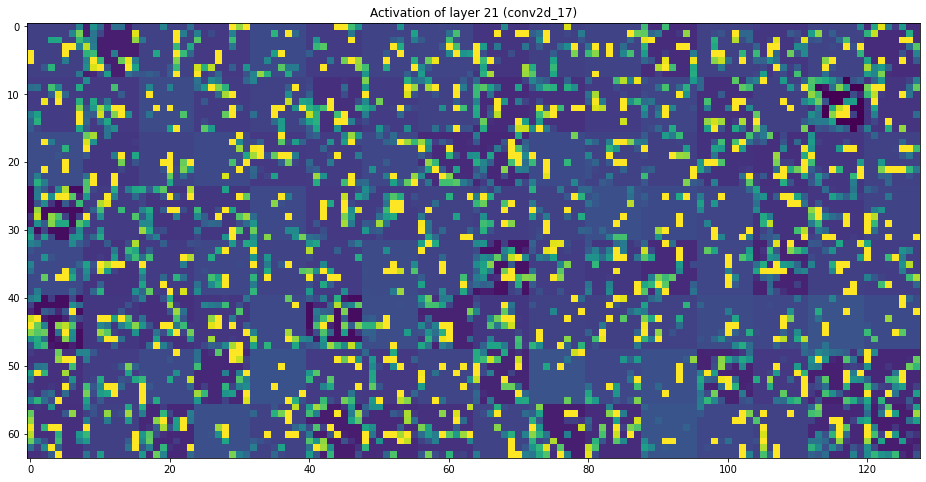

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

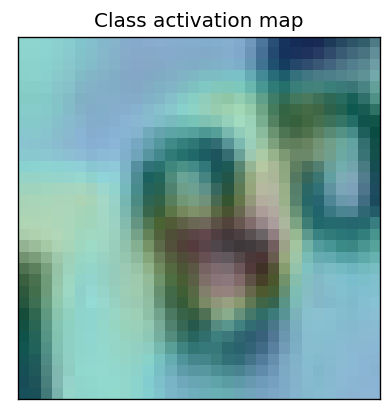

def plot_3_3():
  model = load_model_from_file(base_dir, "model_2_2", extension='.h5')

  x = rgb2gray(X_test)[0]
  x = np.expand_dims(x, axis=0)
  output_m = model.output[:, 7]
  last_conv_layer = model.get_layer('conv2d_17')
  grads = K.gradients(output_m, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (32, 32))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.0007 + X_test[0]
  RGB_im = cv2.cvtColor(superimposed_img.astype(np.float32), cv2.COLOR_BGR2RGB)

  plt.rcParams['figure.dpi'] = 120
  plt.imshow(RGB_im

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

VGG16 was trained with images of objects, not specifically digits. Hence, the error in our dataset is high. By unfreezing the last convolutional block, we increase the accuracy to 83%, which makes sense because the first layers are used to detect patterns, so it is not that bad if we don't train them. The VGG16 model has no regularization layers and overfits a lot (training accuracy of 98%). (length: 395)



Max val score: 83.96%


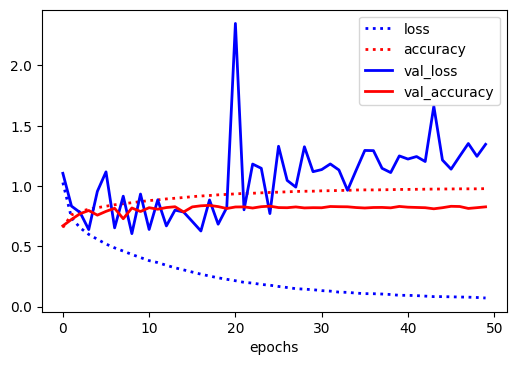

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 14,984,522
Trainable params: 7,348,234
Non-trainable params: 7,636,288
_____________________________________

def build_model_4_1():
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))
  #Freeze the base network, but unfreeze the last block of conv layers
  conv_base.trainable = True 
  set_trainable = False
  for layer in conv_base.layers:
      if layer.name == 'block5_conv1':
          set_trainable = True
      if set_trainable:
          layer.trainable = True
      else:
          layer.trainable = False
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model



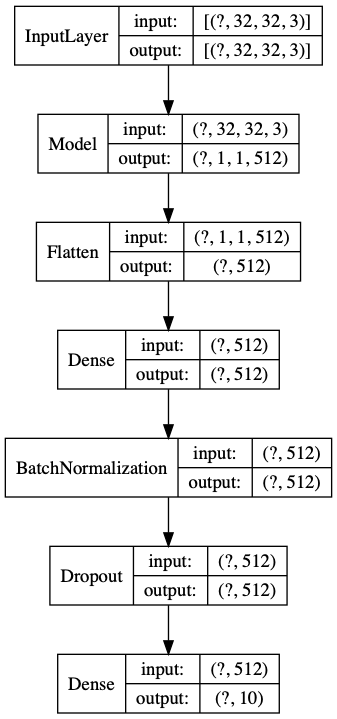

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

testing with the default values. I chose random forest and I tuned the hyperparameters. For the preprocessing, scalers and normalizing were not doing any positive effect, so I implemented a PCA to reduce the dataset to 100 features. This did not increase accuracy, but it made the model faster. I reached 83% of accuracy, which is similar to the one reached on the first exercise with a dense NN. (length: 397)

Pipeline(steps=[('preprocess', PCA(n_components=100, random_state=7)),
                ('reg', RandomForestClassifier(random_state=1))])
def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, "model_4_1", extension='.h5')
  model.pop()
  model.pop()
  model.pop()
  embed_train = model.predict(X_train_all)
  embed_test = model.predict(X_test)
  store_embedding(embed_train, "embed_train")
  store_embedding(embed_test, "embed_test")
  pass

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline'

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 45.53 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
